## Naive Bayes Baseline Implementation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Load Data

In [0]:
train_data_raw = pd.read_csv("./train.csv", encoding="ISO-8859-1") #utf-8 doesn't play nice
test_data_raw = pd.read_csv("./test.csv", encoding="ISO-8859-1")

In [0]:
train_data_raw.head()

,tweetid,text,disaster_type,disaster,Unnamed: 4
0,10001,@TheEllenShow Please check into Salt River hor...,NaN,0,NaN
1,10002,"As for the hurricane, it's already category 1 ...",hurricane,1,NaN
2,10003,So it looks like my @SoundCloud profile shall ...,NaN,0,NaN
3,10004,@SushmaSwaraj Am sure background check of the ...,NaN,0,NaN
4,10005,Open forex detonation indicator is irretrievab...,NaN,0,NaN


### EDA

In [0]:
disaster_type_none_label = 'none'
train_data = train_data_raw.replace(np.nan, disaster_type_none_label, regex=True)
test_data = test_data_raw.replace(np.nan, disaster_type_none_label, regex=True)

Text(0, 0.5, '# of Occurances')

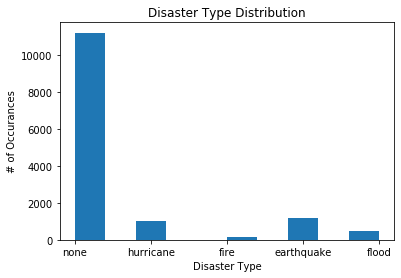

In [0]:
plt.hist(train_data['disaster_type'])
plt.title('Disaster Type Distribution')
plt.xlabel('Disaster Type')
plt.ylabel('# of Occurances')

In [0]:
# Percentage Breakdown
train_data['disaster_type'].value_counts(normalize=True) * 100

none          79.885877
earthquake     8.559201
hurricane      7.132668
flood          3.359486
fire           1.062767
Name: disaster_type, dtype: float64

### Validation Splits

In [0]:
train, valid = train_test_split(train_data, test_size=0.75, random_state=0)

train_x = train.iloc[:, 0:2]
train_y = train.iloc[:,2]
train_y_is_disaster = train.iloc[:,3]

valid_x = valid.iloc[:, 0:2]
valid_y = valid.iloc[:,2]
valid_y_is_disaster = valid.iloc[:,3]

### Vectorizer and Fit for Naive Bayes - By Disaster Type

In [0]:
vectorizer = CountVectorizer(strip_accents="ascii", 
                             token_pattern=u"(?ui)\\b\\w*[a-z]+\\w*\\b", 
                             lowercase=True, 
                             stop_words="english")

In [0]:
train_x_cv = vectorizer.fit_transform(train_x['text'])
valid_x_cv = vectorizer.transform(valid_x['text'])

In [0]:
naive_bayes = MultinomialNB()
naive_bayes.fit(train_x_cv, train_y)
predictions = naive_bayes.predict(valid_x_cv)

In [0]:
print("Accuracy score: ", accuracy_score(valid_y, predictions))
print("Precision score: ", precision_score(valid_y, predictions, average='macro'))
print("Recall score: ", recall_score(valid_y, predictions, average='macro'))

Accuracy score:  0.938754160722777
Precision score:  0.9638532351122363
Recall score:  0.6166863344765846


### Vectorizer and Fit for Naive Bayes - By Disaster Present

In [0]:
vectorizer = CountVectorizer(strip_accents="ascii", 
                             token_pattern=u"(?ui)\\b\\w*[a-z]+\\w*\\b", 
                             lowercase=True, 
                             stop_words="english")

train_x_cv = vectorizer.fit_transform(train_x['text'])
valid_x_cv = vectorizer.transform(valid_x['text'])

naive_bayes = MultinomialNB()
naive_bayes.fit(train_x_cv, train_y_is_disaster)
predictions = naive_bayes.predict(valid_x_cv)

In [0]:
print("Accuracy score: ", accuracy_score(valid_y_is_disaster, predictions))
print("Precision score: ", precision_score(valid_y_is_disaster, predictions))
print("Recall score: ", recall_score(valid_y_is_disaster, predictions))

Accuracy score:  0.9643366619115549
Precision score:  0.9436262061960387
Recall score:  0.8755890669180019
